# 粒子群最適化（PSO）
# オブジェクト指向プログラミングで作成

対応する動画：[オブジェクト指向で粒子群最適化（PSO）のプログラムを作成する【研究で使うPython #29】](https://youtu.be/0VZGeTep9d0)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールインストール

In [1]:
%matplotlib nbagg
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 粒子クラスの定義

In [2]:
class Particle:
    # コンストラクタ
    def __init__(self, x, y):
        self.x = x          # x座標
        self.y = y          # y座標
        self.dx = 0.0       # x方向の速度
        self.dy = 0.0       # y方向の速度
        self.fitness = None # 適応度
        self.p_best = None  # {'x':p_bestのx,'y':p_bestのy, 'fitness':p_bestのfitness}
        self.g_best = None  # {'x':g_bestのx,'y':g_bestのy, 'fitness':g_bestのfitness}
    # 適応度更新メソッド
    def set_fitness(self, fitness):
        self.fitness = fitness
    # p_best更新メソッド
    def set_p_best(self):
        if self.p_best == None:
            self.p_best = {'x':self.x,'y':self.y, 'fitness':self.fitness}
        elif self.p_best['fitness'] > self.fitness:
            self.p_best = {'x':self.x,'y':self.y, 'fitness':self.fitness}
    # g_best更新メソッド
    def set_g_best(self, g_best):
        self.g_best = g_best
    # 位置更新メソッド
    def updatePosition(self):
        self.x += self.dx
        self.y += self.dy
    # 速度更新メソッド
    def updateVelocity(self, w=0.5, rho_max=0.14):
        rho1 = random.uniform(0, rho_max)
        rho2 = random.uniform(0, rho_max)
        self.dx = w * self.dx + rho1 * (self.p_best['x'] - self.x) + rho2 * (self.g_best['x'] - self.x)
        self.dy = w * self.dy + rho1 * (self.p_best['y'] - self.y) + rho2 * (self.g_best['y'] - self.y)

## フィールドクラスの定義

In [3]:
class Field:
    # コンストラクタ
    def __init__(self, N, x_min, x_max, y_min, y_max):
        self.N = N   # 粒子の数
        self.x_min, self.x_max = x_min, x_max
        self.y_min, self.y_max = y_min, x_max
        self.g_best = None # {'x':g_bestのx,'y':g_bestのy, 'fitness':g_bestのfitness}
        self.particleList = [Particle(random.uniform(self.x_min, self.x_max), 
                                      random.uniform(self.y_min, self.y_max)) for i in range(self.N)]
        self.update_best()
    # 評価関数メソッド
    def fitness_func(self, x, y):
        z = x*x + y*y
        # z = 2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2
        return z
    # g_best計算メソッド
    def __set_g_best(self):
        p_index = np.argmin([p.fitness for p in self.particleList])
        self.g_best = {'x':self.particleList[p_index].x,
                       'y':self.particleList[p_index].y, 
                       'fitness':self.particleList[p_index].fitness}
    # 各粒子のp_best, g_best更新メソッド
    def update_best(self):
        # p_best更新
        for particle in self.particleList:
            particle.set_fitness(self.fitness_func(particle.x,particle.y))
            particle.set_p_best()
        # g_best更新
        self.__set_g_best()
        for particle in self.particleList:
            particle.set_g_best(self.g_best)
    # 粒子の位置，移動更新メソッド
    def move_particle(self):
        for particle in self.particleList:
            particle.updatePosition()
            particle.updateVelocity()

## 実行例1

In [4]:
pso = Field(N=30, x_min=-5, x_max=5, y_min=-5, y_max=5) # オブジェクト生成
T = 100  # 制限時間(ループの回数)
for t in range(T):
    pso.move_particle()
    pso.update_best()
print(f"x:{pso.g_best['x']},y:{pso.g_best['y']},z:{pso.g_best['fitness']}")

x:-3.381950472048839e-05,y:6.696049628954946e-06,z:1.188595980172564e-09


## フィールドクラスを継承しアニメーションを作成するクラスの定義（3D）

In [5]:
class Animation_3D(Field):
    # コンストラクタ
    def __init__(self, N, x_min, x_max, y_min, y_max):
        super(Animation_3D, self).__init__(N, x_min, x_max, y_min, y_max)
        self.fig = plt.figure(figsize=(5, 5))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        
        xs = np.linspace(self.x_min, self.x_max, 100)
        ys = np.linspace(self.y_min, self.y_max, 100)
        X, Y = np.meshgrid(xs, ys)
        
        self.ax.plot_wireframe(X,Y,self.fitness_func(X, Y), color='b',rstride=2, cstride=2, linewidth=0.3)
        self.ims = []
    
    # スナップショット
    def snapshot(self):
        im = self.ax.scatter3D([p.x for p in self.particleList],
                               [p.ｙ for p in self.particleList],
                               [p.fitness for p in self.particleList],
                               c='r')
        self.ims.append([im])    
    # 出力
    def output_animation(self):
        global ani # jupyterでアニメーション表示のためにglobalが必要
        ani = animation.ArtistAnimation(self.fig, self.ims)
        ani.save('./anim_PSO_OOP.gif', writer='pillow') 

## 実行例2：アニメーション作成

<IPython.core.display.Javascript object>


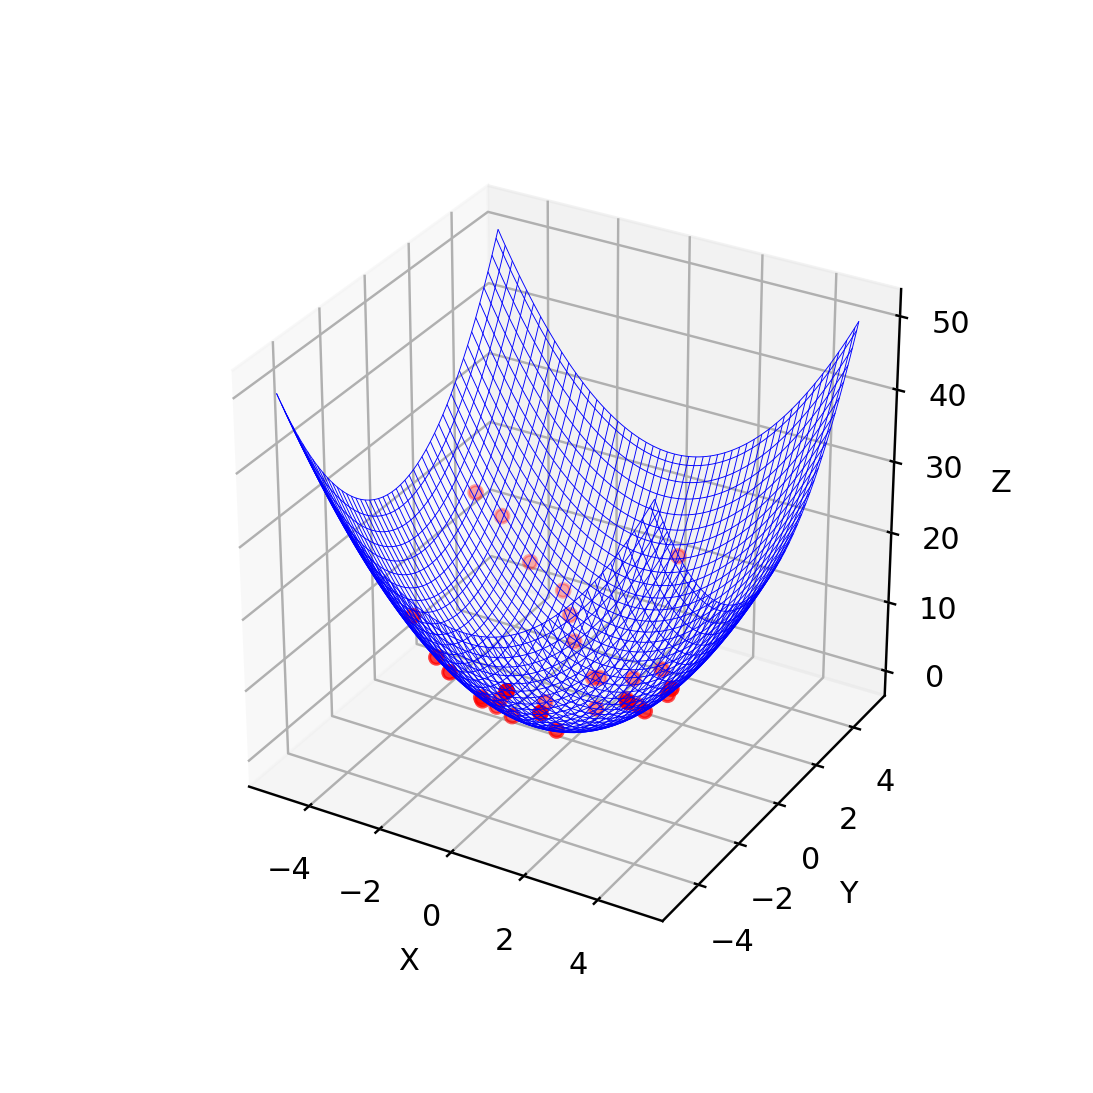

x:0.004125774646870762,y:-2.37978921426886e-06,z:1.7022022100158266e-05


In [6]:
%matplotlib nbagg
pso = Animation_3D(N=30, x_min=-5, x_max=5, y_min=-5, y_max=5) # オブジェクト生成
T = 30  # 制限時間(ループの回数)
for t in range(T):
    pso.move_particle()
    pso.update_best()
    pso.snapshot()
pso.output_animation()
print(f"x:{pso.g_best['x']},y:{pso.g_best['y']},z:{pso.g_best['fitness']}")